In [ ]:
!pip install cv

In [ ]:
# Импорт необходимых библиотек

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1. **`from google.colab import drive`**: Этот оператор импортирует модуль `drive` из библиотеки `google.colab`. Этот модуль предоставляет функциональность для монтирования Google Диска в среде Google Colab.

2. **`drive.mount('/content/drive')`**: Эта строка монтирует ваш Google Диск в папку `/content/drive` в файловой системе Colab. После монтирования вы сможете получать доступ к файлам на вашем Google Диске и взаимодействовать с ними, как если бы они находились на локальном компьютере.

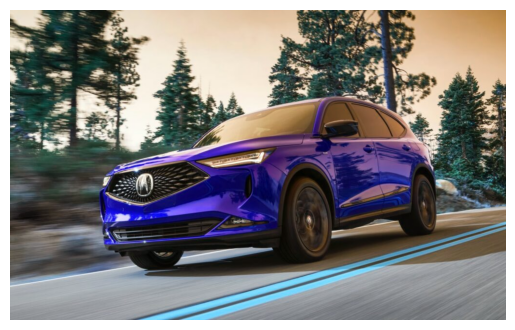

In [ ]:
# Загрузить изображение, вывести на экран

image_path = '/content/drive/My Drive/car.jpg'  # Change this path to your image path in Google Drive
rgb_image = cv2.imread(image_path)

plt.imshow(rgb_image)
plt.axis('off')
plt.show()

# Задание № 1

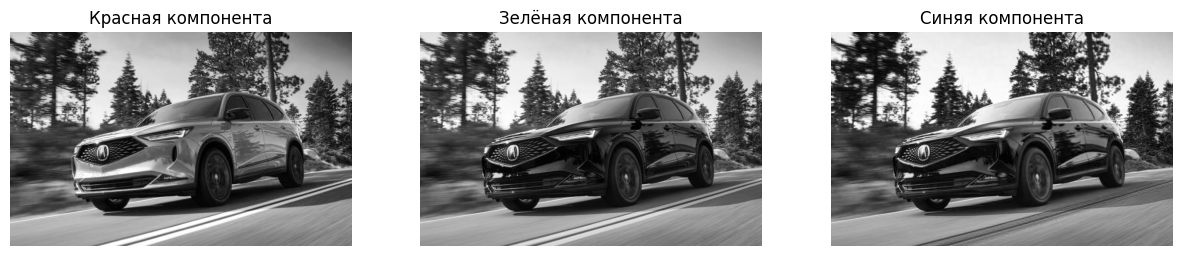

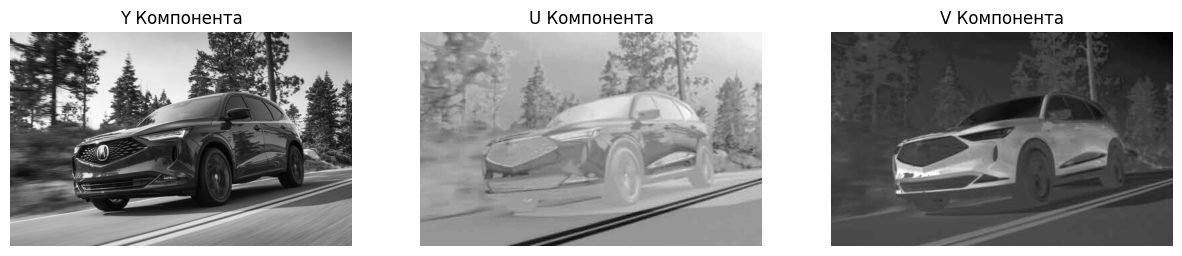

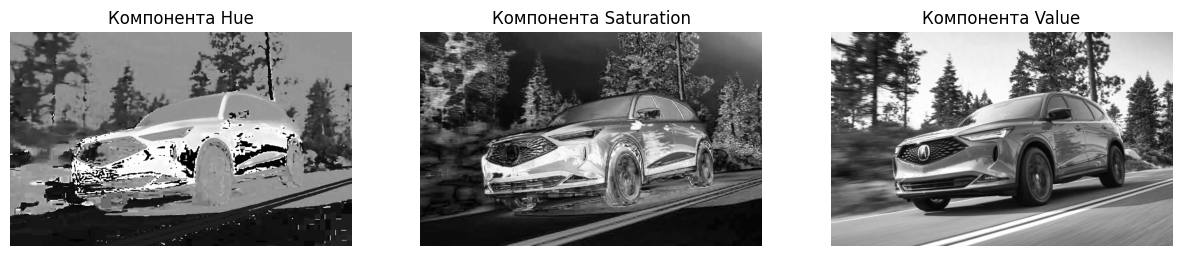

In [ ]:
def display_components(components, titles, cmap=None):
    """Отобразить отдельные компоненты изображения с использованием matplotlib."""
    num_components = len(components)
    plt.figure(figsize=(15, 5))
    for i in range(num_components):
        plt.subplot(1, num_components, i + 1)
        plt.imshow(components[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

def extract_rgb_components(rgb_image):
    """Извлечь компоненты R, G, B из RGB изображения."""
    r, g, b = cv2.split(rgb_image)
    return r, g, b

def rgb_to_yuv(rgb_image):
    """Преобразовать RGB в YUV."""
    yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YUV)
    return yuv_image

def extract_yuv_components(yuv_image):
    """Извлечь компоненты Y, U, V из YUV изображения."""
    y, u, v = cv2.split(yuv_image)
    return y, u, v

def rgb_to_hsv(rgb_image):
    """Преобразовать RGB в HSV."""
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    return hsv_image

def extract_hsv_components(hsv_image):
    """Извлечь компоненты H, S, V из HSV изображения."""
    h, s, v = cv2.split(hsv_image)
    return h, s, v

# Загрузка изображения из Google Drive
image_path = '/content/drive/My Drive/car.jpg'  # Измените путь на путь к вашему изображению в Google Drive
rgb_image = cv2.imread(image_path)

# Преобразование BGR в RGB, так как OpenCV загружает изображения в формате BGR
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Извлечение RGB компонентов
r, g, b = extract_rgb_components(rgb_image)
display_components([r, g, b], ['Красная компонента', 'Зелёная компонента', 'Синяя компонента'], cmap='gray')

# RGB -> YUV и извлечение компонентов
yuv_image = rgb_to_yuv(rgb_image)
y, u, v = extract_yuv_components(yuv_image)
display_components([y, u, v], ['Y Компонента', 'U Компонента', 'V Компонента'], cmap='gray')

# RGB -> HSV и извлечение компонентов
hsv_image = rgb_to_hsv(rgb_image)
h, s, v = extract_hsv_components(hsv_image)
display_components([h, s, v], ['Компонента Hue', 'Компонента Saturation', 'Компонента Value'], cmap='gray')


### Заключение по работе над преобразованием цветовых пространств и выделением компонентов:

1. **Преобразование цветовых пространств**:
   - Задача заключалась в преобразовании изображения между различными цветовыми пространствами: RGB → YUV → RGB и RGB → HSV → RGB. Эти преобразования важны в области компьютерного зрения для манипулирования цветом, компрессии и анализа изображений.
   - Цветовая модель **YUV** разделяет яркость (Y) и цветность (U и V), что полезно при видео-компрессии и коррекции цвета.
   - Цветовая модель **HSV** представляет цвет (Hue), насыщенность (Saturation) и яркость (Value) в более интуитивной форме, что делает ее удобной для сегментации по цвету и других задач обработки изображений.

2. **Выделение компонентов**:
   - Для каждого цветового пространства были извлечены отдельные компоненты (R, G, B для RGB; Y, U, V для YUV; H, S, V для HSV). Визуализация этих компонентов отдельно помогает понять, как каждый канал вносит вклад в итоговое изображение.
   - **Компоненты RGB**: При отображении в градациях серого они показывают интенсивность красных, зеленых и синих пикселей. Отображение их в соответствующих цветах помогает визуализировать вклад каждого цвета в общее изображение.
   - **Компоненты YUV**: Компонент Y представляет яркость, тогда как U и V несут информацию о цвете. Это разделение полезно для задач, требующих отдельной работы с яркостью и цветом изображения.
   - **Компоненты HSV**: Компонент Hue кодирует сам цвет, Saturation — интенсивность цвета, а Value — яркость. Эти компоненты предлагают более интуитивное представление цвета, чем модель RGB, для многих задач компьютерного зрения.

3. **Практическая значимость**:
   - Данная работа демонстрирует важность преобразования цветовых пространств и анализа компонентов в различных задачах компьютерного зрения, таких как сегментация изображений, обнаружение объектов и обработка видео.
   - Различные цветовые пространства подходят для разных задач: **RGB** — наиболее распространено в системах отображения, **YUV** часто используется в видео-компрессии, а **HSV** — для фильтрации и сегментации по цвету.

4. **Визуализация и понимание**:
   - Визуализация каждого компонента отдельно, как в градациях серого, так и в цвете, дает более глубокое понимание того, как разные цветовые модели представляют и обрабатывают цветовую информацию. Это важно для разработки алгоритмов, основанных на анализе цвета.

**В итоге**, работа дала ценные знания о том, как можно преобразовывать цветовые пространства и как отдельные компоненты влияют на представление изображения. Понимание и манипуляция цветовыми пространствами являются важной частью многих приложений компьютерного зрения, а способность выделять и анализировать компоненты повышает контроль и точность обработки изображений.